# Let's Grow More (LGMVIP) - "DATA SCIENCE INTERN"
# LGMVIP Jan-23
## AUTHOR - Danish Hasan
## INTERMEDIATE LEVEL TASK
TASK-2- PREDICTIO USING DECISION TREE ALGORITHM :

Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.


### Importing libraries

In [1]:
#importing some basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the iris dataset

iris =   pd.read_csv(r"C:\Users\Danish\Downloads\iris.csv") #Iris.csv is now a pandas dataframe
print("Head ==> \n",iris.head()) #prints first 5 values

Head ==> 
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
#viewing the dataframe

iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#viewing inf0 of the dataframe

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#checking for null values

iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### We can see that all values are 0. It means that there are no null values over the entire data frame.

In [7]:
#viewing columns

iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
#Viewing the statistical description of the dataset.

iris.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


# Visualizations

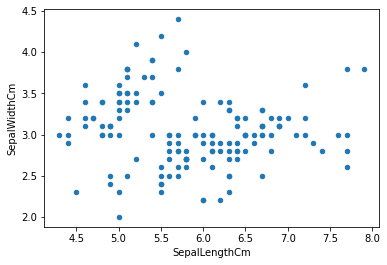

In [13]:
#Viewing the data using matplotlib

iris.plot(kind="scatter", x="SepalLengthCm",   y="SepalWidthCm")
plt.show()

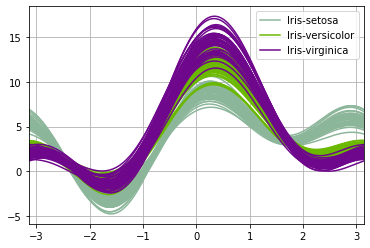

In [19]:
#Visualizing the data using pandas’ andrew curves :
#Andrews curves have the functional form:
#f(t) = x_1/sqrt(2) + x_2 sin(t) + x_3 cos(t) +
#x_4 sin(2t) + x_5 cos(2t) + …
#Where x coefficients correspond to the values of each dimension and t is linearly spaced between -pi and +pi. 
#Each row of the frame then corresponds to a single curve.

from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")
plt.show()

### We have 150 rows in which 50 belong to Iris-setosa, 50 belong to Iris-Versicolor, and the remaining 50 belong to Iris_virginica.
 

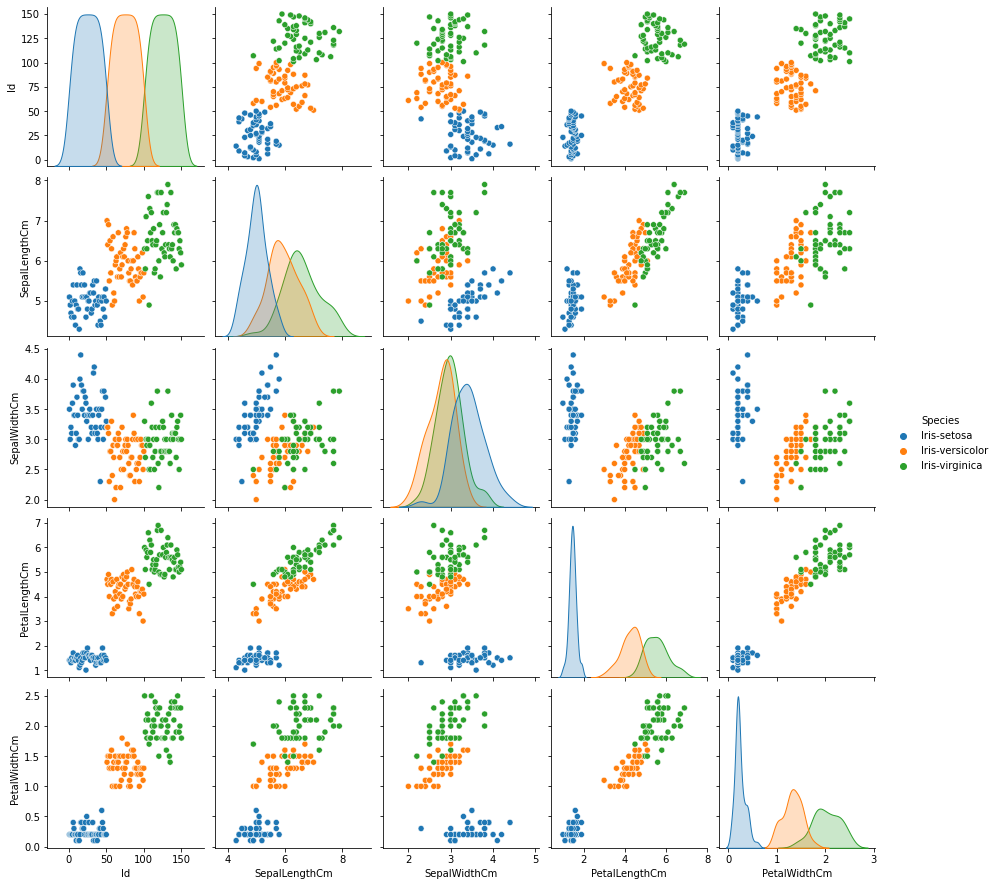

In [18]:
sns.pairplot(iris,hue="Species")

# Data Preparation

In [20]:
iris = iris.drop('Id', axis=1)
iris.head()
     

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Preprocessing

In [22]:
x=iris.iloc[:,:4].values  #last column values excluded
#x = iris.iloc[:, :-1].values #last column values excluded

In [23]:
y=iris.iloc[:,4].values   #last column value
#y = iris.iloc[:,   -1].values #last column value

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
std = StandardScaler()
x = std.fit_transform(x)

In [30]:
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0) #splitting to train & test

# Decision Tree Classifier (Supervised ML)

In [33]:
from sklearn.tree import   DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [34]:
classifier   = DecisionTreeClassifier()

In [35]:
classifier.fit(x_train,   y_train) #training the classifier

DecisionTreeClassifier()

## Prediction 

In [36]:
y_pred   = classifier.predict(x_test) #making precdictions

In [42]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

## Model Evaluation 

In [39]:

from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(classification_report(y_test,   y_pred)) #Summary of the predictions made by the   classifier

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.95      0.97        19
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



In [49]:
cm = (confusion_matrix(y_test, y_pred)) #to evaluate the quality of the output
cm

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  0, 15]], dtype=int64)

In [47]:
print('accuracy   is',accuracy_score(y_pred,y_test)) #Accuracy   score

accuracy   is 0.98


In [50]:
lst = iris['Species'].unique().tolist()
df_cm = pd.DataFrame(data = cm, index = lst, columns = lst)
df_cm

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,16,0,0
Iris-versicolor,0,18,1
Iris-virginica,0,0,15


# Data visualization for the Model

In [51]:
col = iris.columns.tolist()
print(col)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


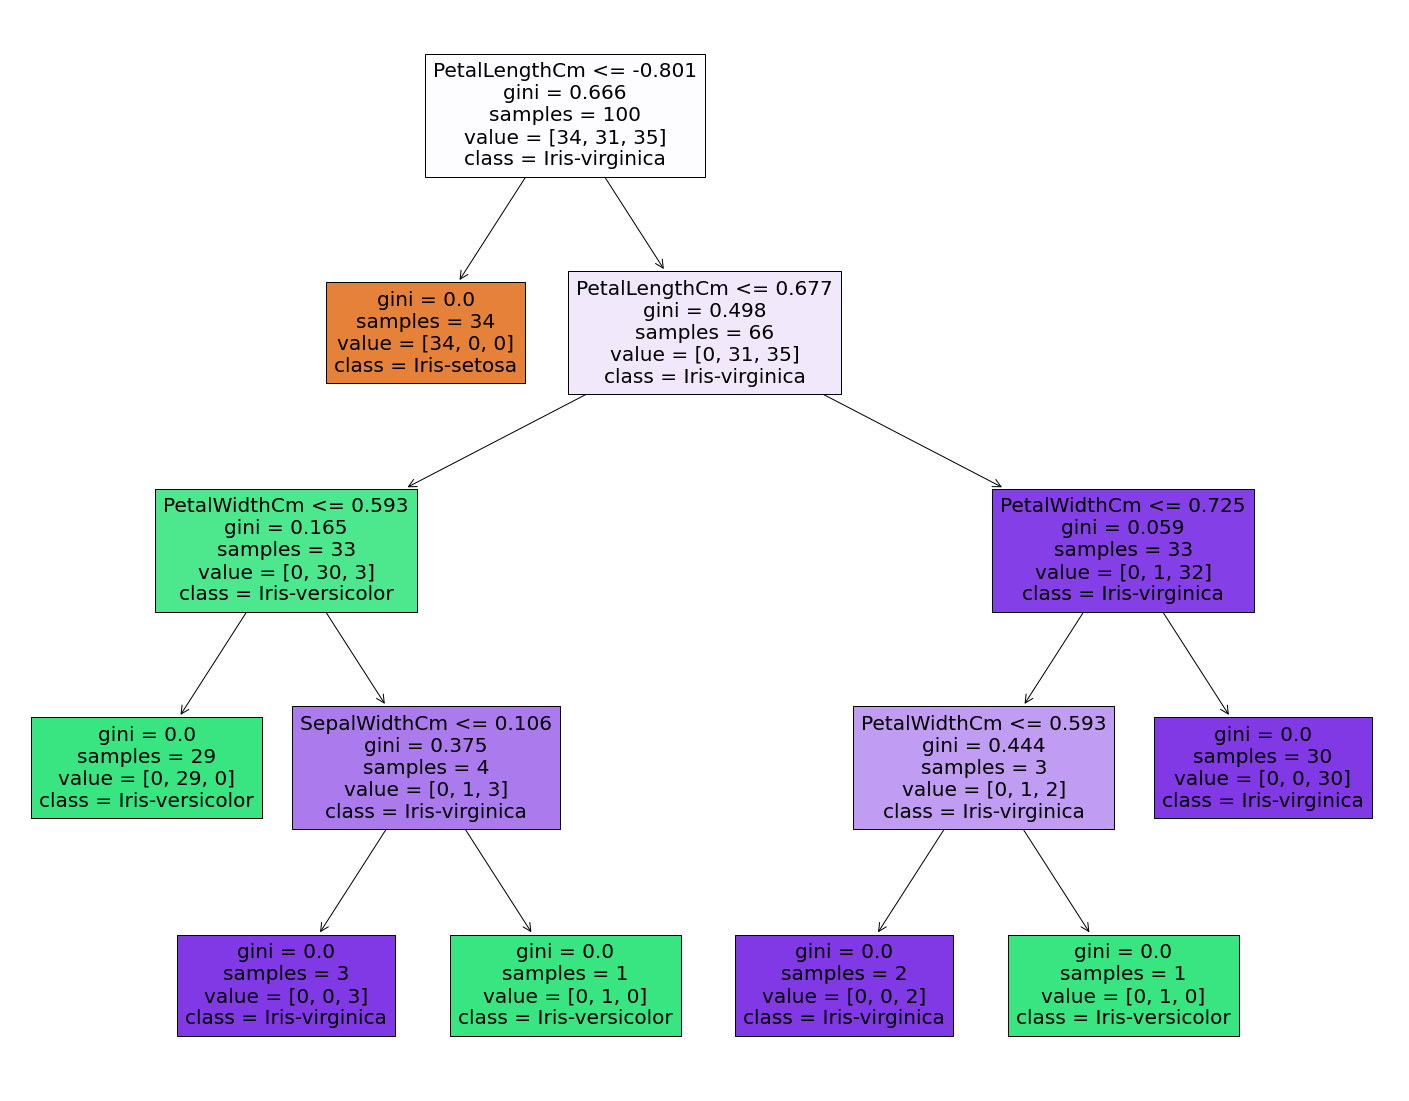

In [53]:
from sklearn.tree import plot_tree
     

fig = plt.figure(figsize=(25, 20))
tree_distrbtn = plot_tree(classifier, feature_names = col, class_names = lst, filled = True)

# Heatmap for confusion matrix

In [54]:
plt.figure(figsize=(5.5,4))

<Figure size 396x288 with 0 Axes>

<Figure size 396x288 with 0 Axes>

Text(0.5, 15.0, 'Predicted label')

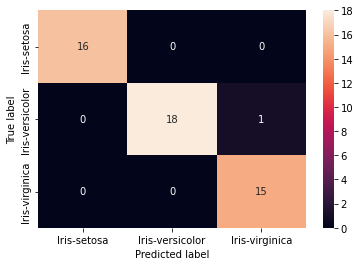

In [55]:
sns.heatmap(df_cm,   annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')